In [1]:
%tensorflow_version 2.x
!pip install -q tf-hub-nightly==0.8.0.dev201911110007
!pip install -q git+https://github.com/tensorflow/examples

TensorFlow 2.x selected.
     |████████████████████████████████| 92kB 7.0MB/s 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_customization.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_customization.core.task import image_classifier
from tensorflow_examples.lite.model_customization.core.task.model_spec import efficientnet_b0_spec
from tensorflow_examples.lite.model_customization.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [11]:
%cd RecycleSort_dataset/

/gdrive/My Drive/RecycleSort_dataset


In [12]:
data = ImageClassifierDataLoader.from_folder('recyclesort_dataset/')

INFO:tensorflow:Load image with size: 2505, num_label: 6, labels: cardboard, glass, metal, paper, plastic, trash.


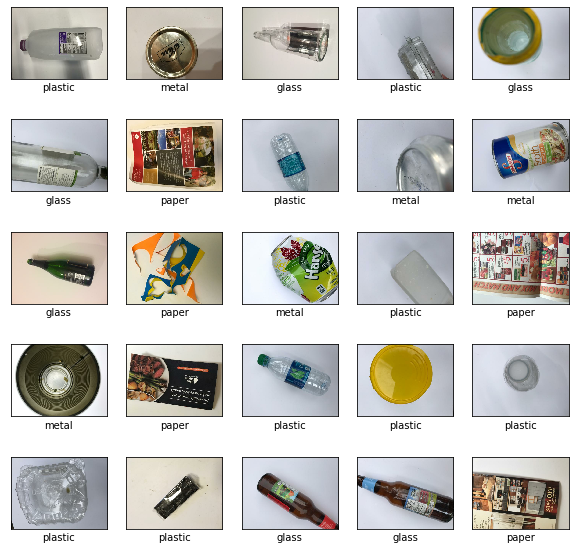

In [13]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [14]:
model = image_classifier.create(data, epochs=15)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Train for 62 steps, validate for 7 steps
Epoch 1/15
62/62 [==============================] - 534s 9s/step - loss: 1.1680 - accuracy: 0.6583 - val_loss: 0.8338 - val_accuracy: 0.8438
Epoch 2/15
62/62 [==============================] - 13s 208ms/step - loss: 0.8491 - accuracy: 0.8150 - val_loss: 0.7952 - val_accuracy: 0.8482
Epoch 3/15
62/62 [==============================] - 13s 208ms/step - loss: 0.7807 - accuracy: 0.8518 - val_loss: 0.7810 - val_accuracy: 0.8482
Epoch 4/15
62/62 [==============================] - 13s 203ms/step - loss: 0.7417 - accuracy: 0.8664 - val_loss: 0.7656 - val_accuracy: 0.8348
Epoch 5/15
62/62 [==============================] - 12s 197ms/step - loss: 0.7090 - accuracy: 0.8911 - val_loss: 0.7584 - val_accuracy: 0.8571
Epoch 6/15
62/62 [==============================] - 13s 211ms/step - loss: 0.6864 - accuracy: 0.9007 - val_loss: 0.7538 - val_accuracy: 0.8661
Epoch 7/15
62/62 [==============================] - 13s 205ms/step - loss: 0.6769 - accuracy: 0.9088 - 

In [15]:
loss, accuracy = model.evaluate()

8/8 [==============================] - 2s 259ms/step - loss: 0.8068 - accuracy: 0.8560


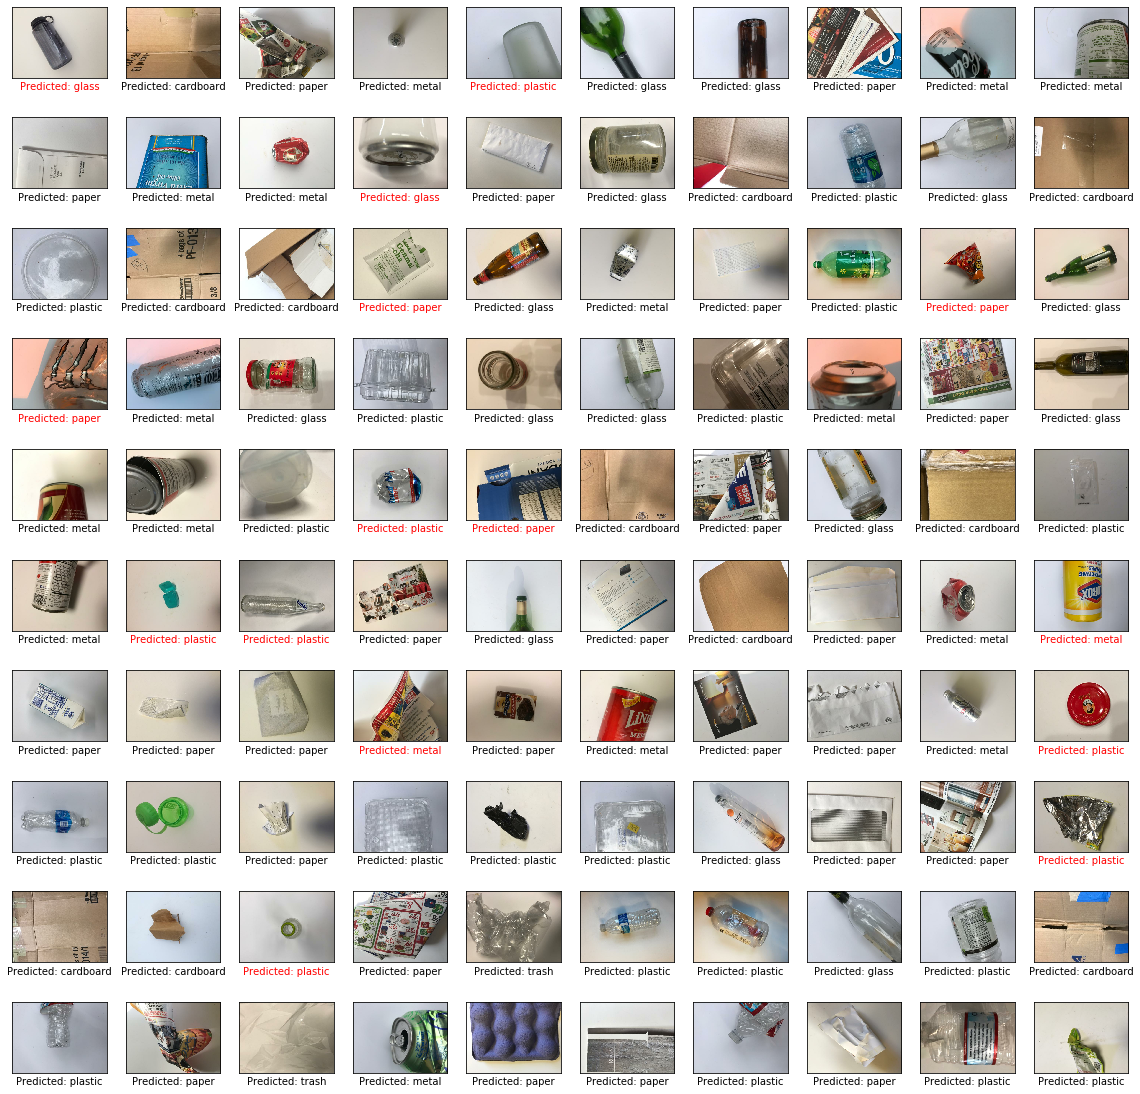

In [16]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_topk(model.test_data)
for i, (image, label) in enumerate(model.test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          model.test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [17]:
model.export('recyclesort_classifier.tflite', 'recyclesort_labels.txt')

INFO:tensorflow:Export to tflite model recyclesort_classifier.tflite, saved labels in recyclesort_labels.txt.


INFO:tensorflow:Export to tflite model recyclesort_classifier.tflite, saved labels in recyclesort_labels.txt.
